## Maximum Margin Classifiers

In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel
from Kernel import RBF, SupportVectorClassifier

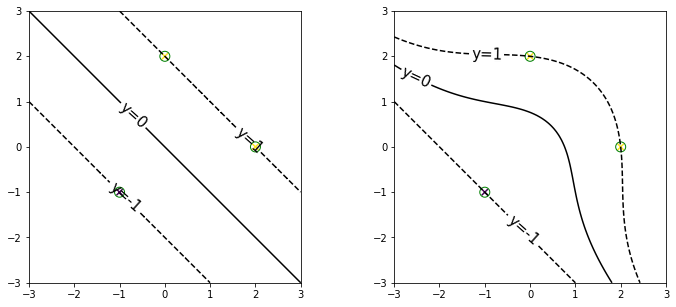

In [2]:
x_train = np.array([
        [0., 2.],
        [2., 0.],
        [-1., -1.]])
t_train = np.array([1., 1., -1.])

model = SupportVectorClassifier(linear_kernel)
model.fit(x_train, t_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=t_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, model.distance(x).reshape(100, 100), np.array([-1, 0, 1]), colors="k", 
                 linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")


plt.subplot(1, 2, 2)
model = SupportVectorClassifier(polynomial_kernel) # the default is degree=3
model.fit(x_train, t_train)
x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=t_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
cp = plt.contour(x0, x1, model.distance(x).reshape(100, 100), np.array([-1, 0, 1]), colors="k", 
                 linestyles=("dashed", "solid", "dashed"))
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

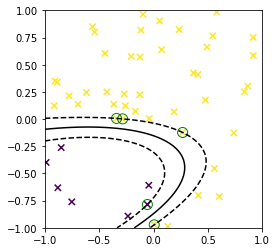

In [3]:
def create_data():
    x = np.random.uniform(-1, 1, 100).reshape(-1, 2)
    t = x < 0
    t = (t[:, 0] * t[:, 1]).astype(np.float)
    return x, 1 - 2 * t

np.random.seed(1234)
x_train, t_train = create_data()

model = SupportVectorClassifier(RBF(np.ones(3)))
model.fit(x_train, t_train)

x0, x1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=t_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contour(x0, x1, model.distance(x).reshape(100, 100),
    np.arange(-1, 2), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect("equal", adjustable="box")

A example from sklearn. It shows
- decision boundary
- nearest vectors

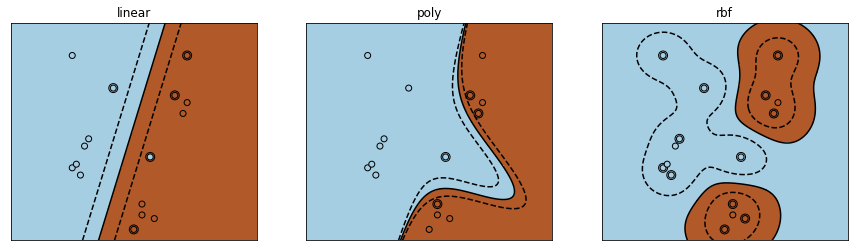

In [4]:
from sklearn import svm

# Our dataset and targets
X = np.c_[(.4, -.7), (-1.5, -1), (-1.4, -.9), (-1.3, -1.2), (-1.1, -.2),
          (-1.2, -.4), (-.5, 1.2), (-1.5, 2.1), (1, 1),
          # --
          (1.3, .8), (1.2, .5), (.2, -2), (.5, -2.4), (.2, -2.3), (0, -2.7), (1.3, 2.1)].T
Y = [-1] * 8 + [1] * 8
plt.figure(figsize=(15, 4))

for fignum, kernel in enumerate(['linear', 'poly', 'rbf']):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)
    plt.subplot(1, 3, fignum+1)
    
    # plot the line, the points, and the nearest vectors to the plane
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')

    plt.axis('tight')
    plt.title("{}".format(kernel))
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
plt.show()

## Relation to logistic regression
Figure 7.5

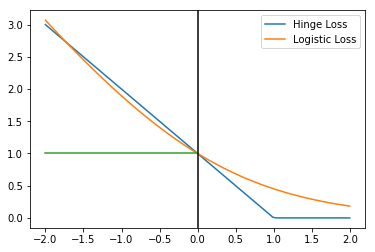

In [5]:
x = np.linspace(-2, 2, 100)
plt.plot(x, np.where(x < 1, 1 - x, 0), label="Hinge Loss")
plt.plot(x, np.log(1+np.exp(-x))/np.log(2), label="Logistic Loss")
plt.plot(x[x<0], np.ones_like(x[x<0]))
plt.axvline(0, color='black')
plt.legend()
plt.show()